In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20, 25))

In [2]:
URL = 'https://raw.githubusercontent.com/KZoc/Formacao_1_Data_Science/main/Pandas/Dados/aluguel_residencial.csv'
dados = pd.read_csv(URL, sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Apartamento,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Casa,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Apartamento,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Apartamento,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Apartamento,1618.0
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Apartamento,2216.0
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Apartamento,1969.0
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,Apartamento,2611.0
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,Apartamento,2301.0
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,Apartamento,15803.0


In [3]:
dados.index = range(dados.shape[0])

## Iniciando a análise exploratória dos dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22262 entries, 0 to 22261
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tipo         22262 non-null  object 
 1   Bairro       22262 non-null  object 
 2   Quartos      22262 non-null  int64  
 3   Vagas        22262 non-null  int64  
 4   Suites       22262 non-null  int64  
 5   Area         22262 non-null  int64  
 6   Valor        22262 non-null  float64
 7   Condominio   22262 non-null  float64
 8   IPTU         22262 non-null  float64
 9   Grupo        22262 non-null  object 
 10  Valor_Total  22262 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1.9+ MB


### - Com base nas informações fica claro ser inviável gerar qualquer tipo de gráfico com todas as informações, pois há muitas. Portanto, vou começar fazer algumas análises para começar pensar em uma abordagem para extrair bons insights dos dados.

In [5]:
dados['Tipo'].value_counts()

# Vemos que há muito mais apartamentos do que casas

Apartamento           18780
Casa                    965
Casa de Condomínio      901
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: Tipo, dtype: int64

In [6]:
dados['Grupo'].value_counts()

Apartamento    20147
Casa            2115
Name: Grupo, dtype: int64

In [7]:
dados['Bairro'].value_counts()

Barra da Tijuca             3943
Copacabana                  2717
Ipanema                     1915
Recreio dos Bandeirantes    1652
Leblon                      1322
                            ... 
Senador Camará                 1
Caju                           1
Rio da Prata                   1
Cidade Jardim                  1
Coelho Neto                    1
Name: Bairro, Length: 152, dtype: int64

In [8]:
dados['Tipo'].value_counts()

Apartamento           18780
Casa                    965
Casa de Condomínio      901
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: Tipo, dtype: int64

In [9]:
dados['Area'].describe()

count    22262.00000
mean       135.39664
std        142.76856
min         10.00000
25%         64.00000
50%         90.00000
75%        150.00000
max       3000.00000
Name: Area, dtype: float64

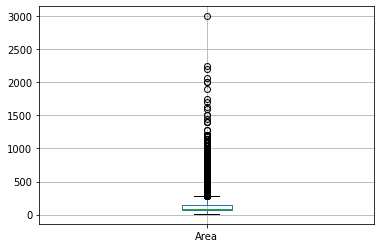

In [10]:
dados.boxplot(['Area'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


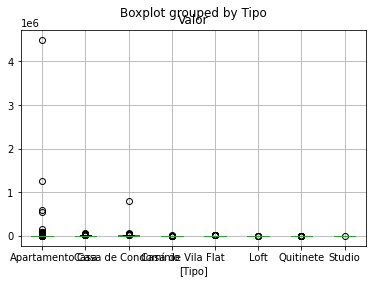

In [11]:
dados.boxplot(['Valor'], by = ['Tipo'])

### Com base nas informações obtidas acima, vemos que há uma grande variação entre os dados, logo, para começar a direcionar as análises vamos definir alguns parâmetros e também definir quais perguntas queremos responder com essas análises:

### 1) Perguntas a serem resposdidas:
#### - Qual bairro mais barato?
#### - Qual o bairro de valor médio?
#### - Qual o bairro mais caro?
#### - Quais os tipos de imóveis mais baratos e mais caros nos bairros identificados nas perguntas acima? Exemplo: O mais barato é uma casa de 50m² e o mais caro é um apartamento de 170m²

### 2) Parâmetros:
#### - Separar os imóveis por faixa de área, exemplo (De 10 a 40m², De 41 a 70m2 e assim por diante)
#### - Separar por Tipo de Imóvel
#### - Separar por Bairro

### ------  Primeiro Vou criar um novo DataFrame Removendo os Valores Outliers.

In [12]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
7787,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,Apartamento,601100.0
10858,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,Casa,800900.0
12928,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,Apartamento,551000.0
14129,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,Apartamento,1251506.0
15837,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,Apartamento,4501100.0


### ----- Para eliminar esses outliers faremos as etapas a seguir:

In [13]:
valor = dados['Valor']

#### ----- Abaixo são as métricas padrão para calcular os limites mostrados em um boxplot, e que são extraidos do nosso dataframe

In [14]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [15]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

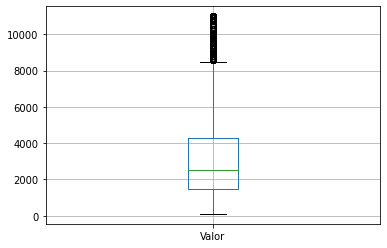

In [16]:
dados_new.boxplot(['Valor'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


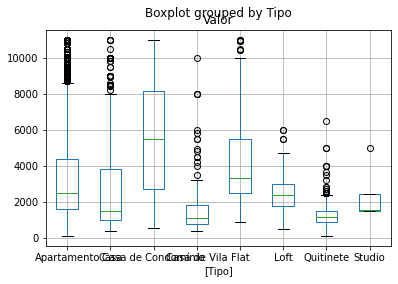

In [17]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

#### ----- Vendo o gráfico acima notamos que ainda existem outliers dentro de cada tipo de imóvel, logo, para filtrar e melhorar ainda mais nossos dados, vamos criar um laço para remover os outliers de cada tipo de imóvel.

In [18]:
grupo_tipo = dados_new.groupby('Tipo')

In [19]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
dados_filtrados = pd.DataFrame()

for tipo, dft in grupo_tipo:
    valor = dft['Valor']
    Q1 = valor.quantile(.25)
    Q3 = valor.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5*IIQ
    limite_superior = Q3 + 1.5*IIQ

    dentro_limite = (dft['Valor'] >= limite_inferior) & (dft['Valor'] <= limite_superior)
    dados_selecao = dft[dentro_limite]
    dados_filtrados = pd.concat([dados_filtrados, dados_selecao])
    
    
#     print('Inferior = {} e Superior = {}'.format(limite_inferior, limite_superior))


In [21]:
dados_new.shape[0]

20265

In [22]:
dados_filtrados.shape[0]

19413

#### Os números acima mostram a diferença na quantidade de itens nos dois DataFrames, logo, confirmamos que foram removidos um total de 20265 - 19413 = 852 imóveis do DataFrame

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


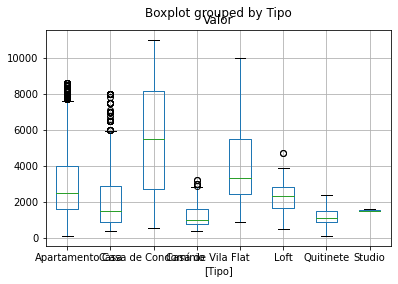

In [23]:
grupo_tipo2 = dados_filtrados.groupby('Tipo')
dados_filtrados.boxplot(['Valor'], by = ['Tipo'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec96f5c390>,
      dtype=object)

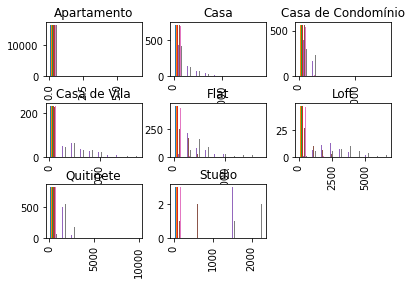

In [24]:
dados_filtrados.hist(['Valor'], by = ['Tipo'])

### Agora farei um agrupamento por bairro e depois farei uma análise dos valores por bairro e depois quais tipos de imóveis estão nos bairros selecionados

In [25]:
grupo_bairro = dados_filtrados.groupby(['Bairro'])

In [26]:
grupo_bairro.Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.333333,425.321167,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,5.0,1760.000000,1216.244219,600.0,1000.0,1600.0,1850.0,3750.0
Anchieta,4.0,875.000000,132.287566,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.711340,408.105582,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.873239,1523.974643,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,47.0,1466.808511,680.316762,800.0,1000.0,1200.0,1650.0,4500.0
Vila da Penha,104.0,1260.576923,644.656644,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.375000,199.598555,700.0,1012.5,1200.0,1225.0,1400.0


In [27]:
df_filtrados = pd.DataFrame()

for bairro, dft in grupo_bairro:
    valor = dft['Valor_Total']
    Q1 = valor.quantile(.25)
    Q3 = valor.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5*IIQ
    limite_superior = Q3 + 1.5*IIQ

    dentro_limite = (dft['Valor_Total'] >= limite_inferior) & (dft['Valor_Total'] <= limite_superior)
    dados_selecao = dft[dentro_limite]
    df_filtrados = pd.concat([df_filtrados, dados_selecao])

In [28]:
df_filtrados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
3250,Apartamento,Abolição,2,2,0,81,850.0,350.0,49.0,Apartamento,1249.0
7095,Apartamento,Abolição,2,1,0,65,1300.0,280.0,0.0,Apartamento,1580.0
7793,Apartamento,Abolição,2,0,0,50,1000.0,250.0,0.0,Apartamento,1250.0
13443,Apartamento,Abolição,2,0,0,45,1200.0,65.0,10.0,Apartamento,1275.0
14476,Apartamento,Abolição,2,0,0,43,800.0,341.0,14.0,Apartamento,1155.0
...,...,...,...,...,...,...,...,...,...,...,...
13771,Apartamento,Água Santa,2,0,0,60,850.0,120.0,13.0,Apartamento,983.0
14063,Apartamento,Água Santa,2,0,0,83,950.0,150.0,37.0,Apartamento,1137.0
14482,Apartamento,Água Santa,2,1,0,50,800.0,310.0,0.0,Apartamento,1110.0
17006,Apartamento,Água Santa,2,1,0,58,700.0,500.0,35.0,Apartamento,1235.0


In [29]:
grupo_bairro = df_filtrados.groupby(['Bairro'])

In [30]:
grupo_bairro_analise = grupo_bairro['Valor_Total'].aggregate(['min', 'max', 'mean', 'count']).round(2).rename(columns = {'min': 'Min', 'max': 'Max', 'mean': 'Valor_Médio', 'count': 'Qtde_de_Imoveis'})

In [31]:
type(grupo_bairro_analise)

pandas.core.frame.DataFrame

In [32]:
grupo_bairro_selecao = grupo_bairro_analise['Qtde_de_Imoveis'] > 5
grupo_bairro_analise = grupo_bairro_analise[grupo_bairro_selecao]

In [33]:
grupo_bairro_analise = grupo_bairro_analise.reset_index()

In [34]:
grupo_bairro_analise.head(10)

,Bairro,Min,Max,Valor_Médio,Qtde_de_Imoveis
0,Abolição,1076.0,2000.0,1352.43,14
1,Andaraí,1253.0,2996.0,1967.93,95
2,Anil,326.0,6143.0,2346.29,66
3,Arpoador,5000.0,11711.0,8065.78,9
4,Bangu,400.0,1650.0,1113.72,18
5,Barra da Tijuca,1425.0,14700.0,5911.30,3010
6,Bento Ribeiro,480.0,2000.0,1096.77,22
7,Bonsucesso,600.0,2240.0,1445.96,56
8,Botafogo,850.0,9370.0,4290.93,869
9,Braz de Pina,450.0,2430.0,1206.63,19


#### Vou estabelecer a condição de só considerar os bairros com mais de 5 imóveis.

In [35]:
# Guardando os valores mínimo, mediano e máximo em variáveis para facilitar o uso depois.
valor_medio_mais_barato = grupo_bairro_analise['Valor_Médio'].min()
valor_medio_mais_caro = grupo_bairro_analise['Valor_Médio'].max()
valor_medio_intermediario = grupo_bairro_analise['Valor_Médio'].median()


# Cada variável do "tipo verifica..." guarda uma series booleana com True para o item que atende a comparação e False para os outros
verifica_bairro_mais_barato = grupo_bairro_analise['Valor_Médio'] == valor_medio_mais_barato
verifica_bairro_medio = grupo_bairro_analise['Valor_Médio'] == valor_medio_intermediario
verifica_bairro_mais_caro = grupo_bairro_analise['Valor_Médio'] == valor_medio_mais_caro
# Junta todas as verificações em uma só variável
selecao = verifica_bairro_mais_barato & verifica_bairro_medio & verifica_bairro_mais_caro
# Filtra o DataFrame "grupo_bairro_analise" com a seleção, ficando apenas os três bairros desejados
grupo_bairro_selecao = grupo_bairro_analise[selecao]


# Guarda na variável apenas a linha correspondente ao bairro desejado 
nome_bairro_mais_barato = grupo_bairro_analise[verifica_bairro_mais_barato]
nome_bairro_medio = grupo_bairro_analise[verifica_bairro_medio]
nome_bairro_mais_caro = grupo_bairro_analise[verifica_bairro_mais_caro]


print('O bairro mais BARATO é {} com valor de aluguel médio de R$ {}'.format(nome_bairro_mais_barato.iloc[0, 0], valor_medio_mais_barato))
print('O bairro INTERMEDIÁRIO é {} com valor de aluguel médio de R$ {}'.format(nome_bairro_medio.iloc[0, 0], valor_medio_intermediario))
print('O bairro mais CARO é {} com valor de aluguel médio de R$ {}'.format(nome_bairro_mais_caro.iloc[0, 0], valor_medio_mais_caro))

O bairro mais BARATO é Gardênia Azul com valor de aluguel médio de R$ 496.88
O bairro INTERMEDIÁRIO é Cachambi com valor de aluguel médio de R$ 1574.05
O bairro mais CARO é Joá com valor de aluguel médio de R$ 10395.0


### Agora vou analisar cada bairro individualmente para encontrar qual imóvel mais barato e mais caro em cada um

#### Analisando os imóveis do bairro mais barato que é o Gardênia Azul

In [36]:
bairro_gardencia = grupo_bairro.get_group('Gardênia Azul')

In [37]:
bairro_gardencia

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
13283,Loft,Gardênia Azul,1,0,0,35,500.0,10.0,0.0,Apartamento,510.0
359,Quitinete,Gardênia Azul,1,0,0,20,485.0,0.0,0.0,Apartamento,485.0
2780,Quitinete,Gardênia Azul,1,0,0,25,500.0,0.0,0.0,Apartamento,500.0
5152,Quitinete,Gardênia Azul,1,0,0,25,490.0,15.0,0.0,Apartamento,505.0
9167,Quitinete,Gardênia Azul,1,0,0,20,500.0,0.0,0.0,Apartamento,500.0
13130,Quitinete,Gardênia Azul,1,0,0,30,500.0,0.0,0.0,Apartamento,500.0
18177,Quitinete,Gardênia Azul,1,0,0,18,485.0,0.0,0.0,Apartamento,485.0
21705,Quitinete,Gardênia Azul,1,0,0,25,490.0,0.0,0.0,Apartamento,490.0


In [38]:
gardencia_imovel_barato = bairro_gardencia['Valor_Total'] == bairro_gardencia['Valor_Total'].min()
gardencia_imovel_barato = bairro_gardencia[gardencia_imovel_barato]
gardencia_imovel_barato

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
359,Quitinete,Gardênia Azul,1,0,0,20,485.0,0.0,0.0,Apartamento,485.0
18177,Quitinete,Gardênia Azul,1,0,0,18,485.0,0.0,0.0,Apartamento,485.0


In [39]:
gardencia_imovel_caro = bairro_gardencia['Valor_Total'] == bairro_gardencia['Valor_Total'].max()
gardencia_imovel_caro = bairro_gardencia[gardencia_imovel_caro]
gardencia_imovel_caro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
13283,Loft,Gardênia Azul,1,0,0,35,500.0,10.0,0.0,Apartamento,510.0


#### Analisando os imóveis do bairro de valor mediano que é o Cachambi

In [40]:
bairro_cachambi = grupo_bairro.get_group('Cachambi')

In [41]:
bairro_cachambi

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Apartamento,1618.0
55,Apartamento,Cachambi,2,0,0,60,1000.0,380.0,280.0,Apartamento,1660.0
250,Apartamento,Cachambi,3,0,0,70,900.0,200.0,30.0,Apartamento,1130.0
255,Apartamento,Cachambi,2,1,0,70,950.0,530.0,30.0,Apartamento,1510.0
530,Apartamento,Cachambi,2,0,0,50,900.0,313.0,0.0,Apartamento,1213.0
...,...,...,...,...,...,...,...,...,...,...,...
17069,Casa de Condomínio,Cachambi,2,1,0,90,1100.0,280.0,0.0,Casa,1380.0
2122,Casa de Vila,Cachambi,2,0,0,59,1000.0,15.0,13.0,Casa,1028.0
9672,Casa de Vila,Cachambi,3,0,0,110,1700.0,0.0,0.0,Casa,1700.0
11700,Casa de Vila,Cachambi,2,1,0,76,1508.0,0.0,0.0,Casa,1508.0


In [42]:
cachambi_imovel_barato = bairro_cachambi['Valor_Total'] == bairro_cachambi['Valor_Total'].min()
cachambi_imovel_barato = bairro_cachambi[cachambi_imovel_barato]
cachambi_imovel_barato

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
21894,Apartamento,Cachambi,1,0,0,30,600.0,100.0,13.0,Apartamento,713.0


In [43]:
cachambi_imovel_caro = bairro_cachambi['Valor_Total'] == bairro_cachambi['Valor_Total'].max()
cachambi_imovel_caro = bairro_cachambi[cachambi_imovel_caro]
cachambi_imovel_caro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
5985,Apartamento,Cachambi,3,2,1,70,2000.0,404.0,0.0,Apartamento,2404.0


#### Analisando os imóveis do bairro mais caro que é o Joá

In [44]:
bairro_joa = grupo_bairro.get_group('Joá')

In [45]:
bairro_joa

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
17501,Casa,Joá,3,7,3,340,7500.0,1900.0,970.0,Casa,10370.0
6888,Casa de Condomínio,Joá,3,7,3,320,7500.0,1900.0,950.0,Casa,10350.0
8840,Casa de Condomínio,Joá,4,3,2,300,10000.0,1630.0,650.0,Casa,12280.0
16748,Casa de Condomínio,Joá,4,3,1,300,6900.0,1200.0,500.0,Casa,8600.0
18659,Casa de Condomínio,Joá,3,3,3,320,7500.0,1900.0,1000.0,Casa,10400.0
21113,Casa de Condomínio,Joá,3,3,1,340,7500.0,1900.0,970.0,Casa,10370.0


In [46]:
joa_imovel_barato = bairro_joa['Valor_Total'] == bairro_joa['Valor_Total'].min()
joa_imovel_barato =  bairro_joa[joa_imovel_barato]
joa_imovel_barato

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
16748,Casa de Condomínio,Joá,4,3,1,300,6900.0,1200.0,500.0,Casa,8600.0


In [47]:
joa_imovel_caro = bairro_joa['Valor_Total'] == bairro_joa['Valor_Total'].max()
joa_imovel_caro =  bairro_joa[joa_imovel_caro]
joa_imovel_caro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Grupo,Valor_Total
8840,Casa de Condomínio,Joá,4,3,2,300,10000.0,1630.0,650.0,Casa,12280.0


## Relatório final da nossa análise

In [48]:
area = plt.figure()

<Figure size 432x288 with 0 Axes>

In [49]:
g1 = area.add_subplot(3,1,1)
g2 = area.add_subplot(3,1,2)
g3 = area.add_subplot(3,1,3)

In [50]:
concatena_gardencia = pd.concat([gardencia_imovel_barato, gardencia_imovel_caro])
concatena_cachambi = pd.concat([cachambi_imovel_barato, cachambi_imovel_caro])
concatena_joa = pd.concat([joa_imovel_barato, joa_imovel_caro])

In [51]:
g1.bar(bairro_gardencia.Tipo, bairro_gardencia.Valor_Total)
g1.set_title('Imóvéis no Bairro Mais Barato - TIPO x VALOR MENSAL')

g2.bar(bairro_cachambi.Tipo, bairro_cachambi.Valor_Total)
g2.set_title('Imóveis do Bairro Médio - TIPO x VALOR MENSAL')

g3.bar(bairro_joa.Tipo, bairro_joa.Valor_Total)
g3.set_title('Imóveis do Bairro Mais Caro - TIPO x VALOR MENSAL')

Text(0.5, 1.0, 'Imóveis do Bairro Mais Caro - TIPO x VALOR MENSAL')

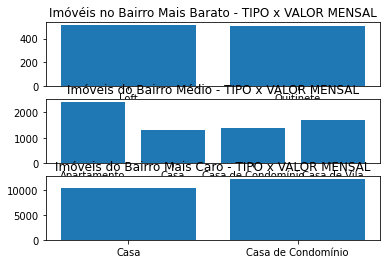

In [52]:
area